In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn import datasets

In [34]:
boston = datasets.load_boston()

In [35]:
X = boston['data']
y = boston['target']

In [20]:
ones = np.ones(len(X)).reshape(-1,1)

In [24]:
X_new = np.c_[ones,X]

In [314]:
class LinearRegression_:
    
    def __init__(self,message = 'Hey there'):
        self.message = message

        
    
    def fit(self,X,y):
        
        if (type(X) != np.ndarray):
            X = np.array(X)
        ones = np.ones(len(X)).reshape(-1,1)
        X = np.c_[ones,X]
        
        self.betas = np.linalg.inv(X.T.dot(X)) @  X.T.dot(y)
        
        return self
    
    def predict(self,X_test):
        ones = np.ones(len(X)).reshape(-1,1)
        X_test = np.c_[ones,X_test]
        self.predictions = X_test.dot(self.betas) 
        
        return self.predictions 
    
    def statistics(self,X,y):
        ones = np.ones(len(X)).reshape(-1,1)
        X = np.c_[ones,X]
        n  = X.shape[0]
        m = X.shape[1]
        
        #variance of the coeffecients
        error = (self.predictions - y)
        error_squared = error.T.dot(error)
        variance_e = error_squared/ (n - m )
        var_b = np.linalg.inv(X.T @ X) * variance_e
        var_b  = np.sqrt(np.diagonal(var_b))
        betas = ['Beta_' + str(i) for i in range(m)]
        
        #t_student test
        
        t_students = [beta/std for beta,std in zip(self.betas,var_b)]
        
        df_stat = pd.DataFrame({
            'Betas' : betas,
            'estimate' : self.betas,
            'std_errors' : var_b,
            't-test': t_students
        })
        
        return df_stat
        
        
            
        

In [317]:
lin_reg = LinearRegression_()

In [318]:
lin_reg.fit(X,y)

In [319]:
lin_reg.betas

array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

In [320]:
predictions = lin_reg.predict(X)

In [600]:
np.mean(predictions)

22.532806324108613

In [601]:
np.mean(y)

22.532806324110677

In [603]:
np.var(predictions) / np.var(y)

0.7406426641093796

In [321]:
from sklearn.metrics import mean_squared_error

In [322]:
error = mean_squared_error(y,predictions)

In [323]:
error_s = np.sqrt(error)

In [324]:
error_s

4.679191295697282

In [351]:
df_stat = lin_reg.statistics(X,y)

In [354]:
df_stat

,Betas,estimate,std_errors,t-test
0,Beta_0,36.459488,5.103459,7.144074
1,Beta_1,-0.108011,0.032865,-3.286517
2,Beta_2,0.046420,0.013727,3.381576
3,Beta_3,0.020559,0.061496,0.334310
4,Beta_4,2.686734,0.861580,3.118381
5,Beta_5,-17.766611,3.819744,-4.651257
6,Beta_6,3.809865,0.417925,9.116140
7,Beta_7,0.000692,0.013210,0.052402
8,Beta_8,-1.475567,0.199455,-7.398004
9,Beta_9,0.306049,0.066346,4.612900


In [352]:
est_sup = [(estimate + 1.96 * std) for estimate,std in zip(df_stat.estimate,df_stat.std_errors)]

In [355]:
est_inf = [(estimate - 1.96 * std) for estimate,std in zip(df_stat.estimate,df_stat.std_errors)]

In [356]:
df_stat['est_sup'] = est_sup
df_stat['est_inf'] = est_inf

In [357]:
df_stat

,Betas,estimate,std_errors,t-test,est_sup,est_inf
0,Beta_0,36.459488,5.103459,7.144074,46.462268,26.456709
1,Beta_1,-0.108011,0.032865,-3.286517,-0.043596,-0.172427
2,Beta_2,0.046420,0.013727,3.381576,0.073326,0.019515
3,Beta_3,0.020559,0.061496,0.334310,0.141090,-0.099973
4,Beta_4,2.686734,0.861580,3.118381,4.375430,0.998037
5,Beta_5,-17.766611,3.819744,-4.651257,-10.279914,-25.253309
6,Beta_6,3.809865,0.417925,9.116140,4.628999,2.990732
7,Beta_7,0.000692,0.013210,0.052402,0.026583,-0.025199
8,Beta_8,-1.475567,0.199455,-7.398004,-1.084636,-1.866498
9,Beta_9,0.306049,0.066346,4.612900,0.436089,0.176010


In [364]:
df_stat_melted = df_stat.melt(id_vars = ['Betas','t-test','std_errors'])

In [366]:
df_stat_melted

,Betas,t-test,std_errors,variable,value
0,Beta_0,7.144074,5.103459,estimate,36.459488
1,Beta_1,-3.286517,0.032865,estimate,-0.108011
2,Beta_2,3.381576,0.013727,estimate,0.046420
3,Beta_3,0.334310,0.061496,estimate,0.020559
4,Beta_4,3.118381,0.861580,estimate,2.686734
5,Beta_5,-4.651257,3.819744,estimate,-17.766611
6,Beta_6,9.116140,0.417925,estimate,3.809865
7,Beta_7,0.052402,0.013210,estimate,0.000692
8,Beta_8,-7.398004,0.199455,estimate,-1.475567
9,Beta_9,4.612900,0.066346,estimate,0.306049


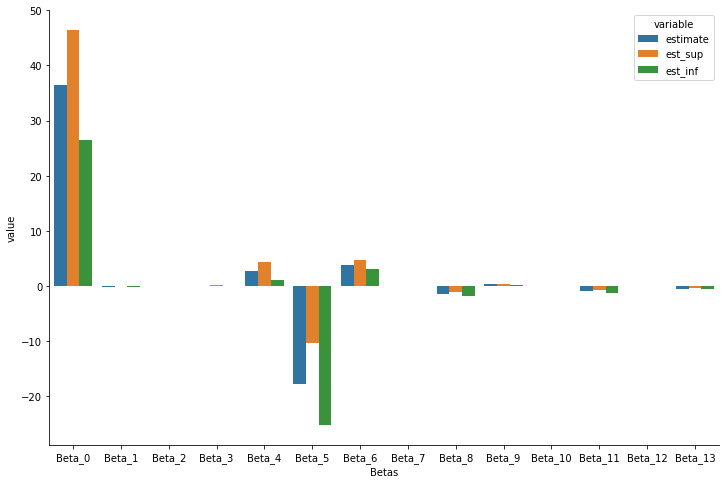

In [372]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'Betas',y = 'value',hue = 'variable',data= df_stat_melted)
sns.despine()

In [376]:
X_ones = np.c_[np.ones(len(X)).reshape(-1,1),X]

In [379]:
pred_sup  = X_ones.dot(df_stat.est_sup)

In [380]:
pred_inf = X_ones.dot(df_stat.est_inf)

In [382]:
df_pred = pd.DataFrame({
    'pred' : predictions,
    'pred_sup' : pred_sup,
    'pred_inf' : pred_inf
})

In [385]:
df_pred_melted = df_pred.melt()

In [389]:
df_pred_melted.index

RangeIndex(start=0, stop=1518, step=1)

In [401]:
liste = list(range(len(predictions)))

In [404]:
liste_index = liste * 3

In [408]:
df_pred_melted.index = liste_index

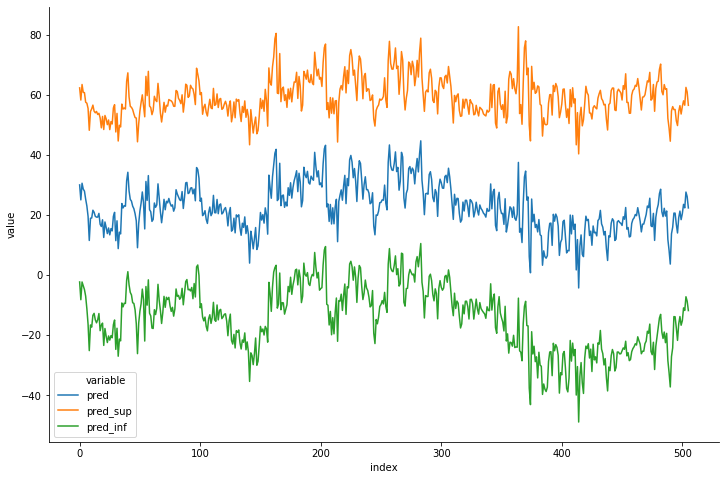

In [414]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'index',y = 'value' , hue = 'variable', data = df_pred_melted.reset_index())
sns.despine()
plt.legend(loc = 'lower left')

In [ ]:
#Are my betas gaussian ? 

In [505]:
betas_boot = []
for i in range(1000):
    random_sample = np.random.choice(range(len(y)),500)
    X_boot = X[random_sample]
    y_boot = y[random_sample]
    lin_reg.fit(X_boot,y_boot)
    betas_boot.append(lin_reg.betas)
    

In [537]:
beta_list = [None] * (X_boot.shape[1]+1)
for liste in range(len(beta_list)):
    beta_list[liste] = []
    
for j in range(len(beta_list)):
    for i in range(len(betas_boot)):
    
        beta_list[j].append(betas_boot[i][j])

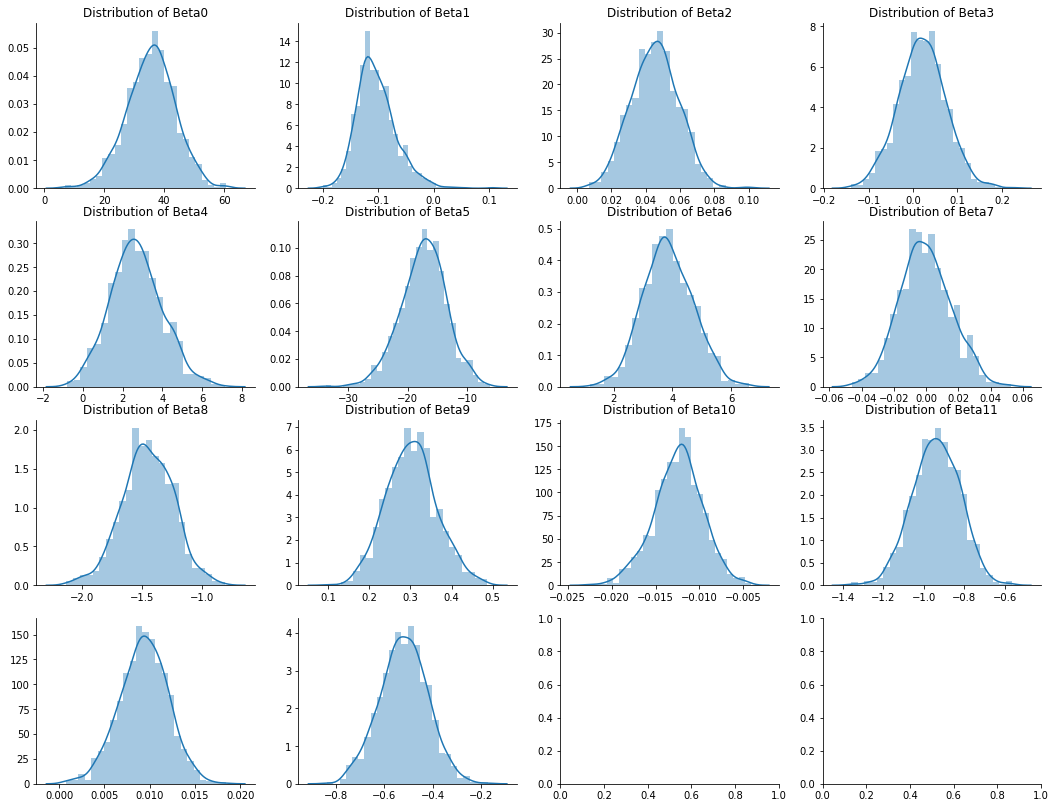

In [551]:
t = 0
fig ,ax  = plt.subplots(4,4,squeeze = False , figsize = (18,14))
for i in range(3):
    for j in range(4):
        sns.distplot(beta_list[t],ax = ax[i,j])
        ax[i,j].set_title('Distribution of Beta' + str(t))
        t += 1
sns.distplot(beta_list[12],ax = ax[3,0])
sns.distplot(beta_list[13],ax = ax[3,1])

sns.despine()